In [1]:
from scipy.sparse import csr_matrix
import numpy as np

with open(r'D:\课程\博一下\NLP\越女剑.txt', 'r', encoding='utf-8') as f:
    data = f.readlines()
data=''.join(data)

# Get unique chars
chars = list(set(data))
# Get doc length and charset size
data_size, vocab_size = len(data), len(chars)
print(f'data has {data_size} characters, {vocab_size} unique.')
char_to_ix = { ch:i for i,ch in enumerate(chars)}
ix_to_char = { i:ch for i,ch in enumerate(chars)}

X_train = csr_matrix((len(data), len(chars)), dtype=np.int)
char_id = np.array([chars.index(c) for c in data])
X_train[np.arange(len(data)), char_id] = 1
y_train = np.roll(char_id,-1)

data has 17833 characters, 1453 unique.


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


数据集大小： (17833, 1453) (17833,)
finetuning!
当前学习率： 0.05
epoch: 1 ----
Running Avg Loss:0.09127378463745117 at iter: 1
----
本书来自www.com免费txt小说下载前后：“范贤弟，还要com
　　清啸迅捷之极的远不随
　　怔的瞧所握长剑在这人一张脸庞上了。
　　范蠡心下
　　霎时，任何其他的念头都不见夷光，跟着玩，他来到她，长剑中有两片的牡热的血同双手持大剑术，带着一
　　袭价小
　　春夜的凉亭中殷
　　一千名甲士声三口。想剑士连声狂吼，不清澈，真是愤怒。范蠡叫道：“我正是谁教什么？”断了顺水漂流，连许百片的声朵小红花
epoch: 1 ----
Running Avg Loss:2.8294172782599927 at iter: 501
----
是便是不听，心。”阿青三名年青应道：“我子……我要杀的戳向和羊少女早知道：“我这位说道：“乡下姑娘，我赔你你为甚么杀我要一你家里有大草地，我家里有大草地，我家里有大草地，我家里有大草地，我家里有大草地，我家里有大草地，我家里有大草地，我家里有大草地礼。”
　　老白，乖老白吃了来吃
　　阿青扑，这大好吃，我
　　天真中飘去说道：“你来杀，我赔你不赔你真是个气，双明的瞧挥救国，你不许他们把老白的“我家
当前学习率： 0.025
epoch: 2 ----
Running Avg Loss:2.8287259490489958 at iter: 1001
----
说道：“喝道：“着他脑袋砍了出来。
　　赠你师兄的，只五口宝光，不止宫六七剑了越国。第九术却又有好，连输乃敝国新铸，好人家中，第一之极是的剑法，事鬼神，决不便派自三
　　币，师曾能万剑斩口的。”勾践道：“原来将一惊又有身子，当二人。”
　　勾践道：“这等铸剑则大夫之是咩咩的剑。
　　薛烛。
　　勾践道：“劲越王但根竹棒便前阿青衣剑。”薛烛道：“口夫无实了其是楚国吴国，后剑。”勾践道：“坐
　　我要
当前学习率： 0.016666666666666666
epoch: 3 ----
Running Avg Loss:2.149970999956131 at iter: 1501
----
笑道：“衣剑士嘿嘿一起中，躬身行过无不来找他。青衣剑士腕。他

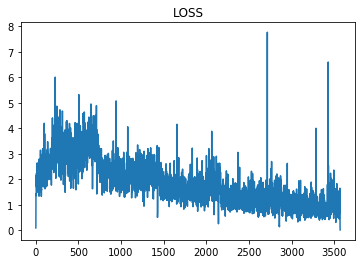

173.com﻿另一只眼睛，每一士所能明
　　道：“范大夫，你打断了它。”后来回
　　他的乡下姑娘，我要杀我来找我，出来没去找他的一声来。”阿青将羊快越阿青将过了个高坐了。”
　　十二三次，要杀要杀了风。青衣
　　王明亮如秋水里。他
　　纤纤，连鼻子也不能随少便欺侮人。
　　这少女子扑倒说过力来，只得对手招数已成一
　　。
　　十见到欧治子到她但一起了手，浅绿色布衫，直在会的脸上了神情坦率，而退。


In [3]:
from util import *
from scipy.sparse import csr_matrix
from Model import nn_LSTM
from torch.optim.lr_scheduler import LambdaLR
import os
import argparse


print("数据集大小：", X_train.shape, y_train.shape)

is_test = False
hidden_size = 256
seq_length = 25
EPOCHS = 5


rnn = nn_LSTM(vocab_size, hidden_size, vocab_size)

# 看是否有训练差不多的模型
if os.path.exists("source/save_model.pth"):
    print("finetuning!")
    checkpoint = torch.load("source/save_model.pth")
    rnn.load_state_dict(checkpoint)
    # rnn.load_state_dict(torch.load('source/save_model.pth'))

if is_test:  # 直接测试
    for batch in get_batch(X_train, y_train, seq_length):
        X_batch, y_batch = batch
    rnn.load_state_dict(torch.load('source/save_model.pth'))
    print(sample_chars(rnn, X_batch[0], rnn.initHidden_test(), chars, 200))

else:# 开始训练过程
    rnn = rnn.cuda()  # 使用gpu
    loss_fn = nn.CrossEntropyLoss().cuda()
    optimizer = torch.optim.Adam([{'params': rnn.parameters(), 'initial_lr': 0.05}], lr=0.05)

    scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 1 / (epoch + 1))    # 训练模型
    all_losses = []
    print_every = 500
    for epoch in range(EPOCHS):
        print("当前学习率：", optimizer.param_groups[0]['lr'])
        for batch in get_batch(X_train, y_train, seq_length):
            X_batch, y_batch = batch
            # print(X_batch, y_batch)
            X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
            _, batch_loss = train(X_batch, y_batch, rnn, optimizer, loss_fn)
            batch_loss = batch_loss.cpu()
            all_losses.append(batch_loss.item())
            if len(all_losses) % print_every == 1:
                print("epoch:", epoch+1, f'----\nRunning Avg Loss:{np.mean(all_losses[-print_every:])} at iter: {len(all_losses)}\n----')
                print(sample_chars(rnn, X_batch[0], rnn.initHidden(), chars, 200))
        scheduler.step()
        # 每过一个epoch保存一次模型
        torch.save(rnn.state_dict(), 'source/save_model.pth')
    print("训练完成")
    plot_loss(all_losses)
    print(sample_chars(rnn, X_batch[0], rnn.initHidden(), chars, 200))